In [1]:
# import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# crate a set of random latitude and longitud combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# add latitud and longitud to a list
coordinates=list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
#impot citipy
from citipy import citipy

In [6]:
# create a list for holding the cities
cities=[]
# identify the nearest city for each latitudes and longitudes combinations.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then we will add to the list.
    if city not in cities:
        cities.append(city)
        

# print the city count to confirm sufficient count.
len(cities)

630

In [7]:
#import the request library
import requests

#import weather api key
from config import weather_api_key

#build the url for Weather Map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95f8ebe0e353bddd04e04cd2e3341b65


In [8]:
# import the datatime module from the datatime library. 
from datetime import datetime

In [9]:
# create an empty list to hold the weather data.
city_data = []

#print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("------------------------")

#create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Prossing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count.
    record_count += 1

# run an api request for each of the cities.
    try:
        #parse the json and retirve the data.
        city_weather = requests.get(city_url).json()
    
        #parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #covert the data to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        #Append the information into the city_data list.
        city_data.append({"City": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
# if an error is experienced skip the city.
    except:
        print("city not found. Skipping...")
        pass
    
# indicate the data loading is complete.
print("---------------------------")
print("Data Retrieval complete    ")
print("---------------------------")


Beginning Data Retrieval   
------------------------
Prossing Record 1 of Set 13 | labuhan
Prossing Record 2 of Set 13 | quechultenango
Prossing Record 3 of Set 13 | araouane
Prossing Record 4 of Set 13 | punta arenas
Prossing Record 5 of Set 13 | kulhudhuffushi
Prossing Record 6 of Set 13 | bethel
Prossing Record 7 of Set 13 | thompson
Prossing Record 8 of Set 13 | atuona
Prossing Record 9 of Set 13 | cabo san lucas
Prossing Record 10 of Set 13 | samastipur
Prossing Record 11 of Set 13 | mataura
Prossing Record 12 of Set 13 | dikson
Prossing Record 13 of Set 13 | ushuaia
Prossing Record 14 of Set 13 | butaritari
Prossing Record 15 of Set 13 | kwakoa
Prossing Record 16 of Set 13 | bilibino
Prossing Record 17 of Set 13 | kodiak
Prossing Record 18 of Set 13 | vostok
Prossing Record 19 of Set 13 | lorengau
Prossing Record 20 of Set 13 | hermanus
Prossing Record 21 of Set 13 | tasiilaq
Prossing Record 22 of Set 13 | chuy
Prossing Record 23 of Set 13 | margate
Prossing Record 24 of Set 13 |

Prossing Record 40 of Set 16 | inirida
Prossing Record 41 of Set 16 | solnechnyy
Prossing Record 42 of Set 16 | gat
Prossing Record 43 of Set 16 | goderich
Prossing Record 44 of Set 16 | mahibadhoo
Prossing Record 45 of Set 16 | tuatapere
Prossing Record 46 of Set 16 | salamanca
Prossing Record 47 of Set 16 | isangel
Prossing Record 48 of Set 16 | vanderhoof
Prossing Record 49 of Set 16 | alindao
Prossing Record 50 of Set 16 | nome
Prossing Record 1 of Set 17 | aasiaat
Prossing Record 2 of Set 17 | katobu
Prossing Record 3 of Set 17 | prince rupert
Prossing Record 4 of Set 17 | rancho palos verdes
Prossing Record 5 of Set 17 | codrington
Prossing Record 6 of Set 17 | champerico
Prossing Record 7 of Set 17 | hilo
Prossing Record 8 of Set 17 | eden
Prossing Record 9 of Set 17 | namibe
Prossing Record 10 of Set 17 | saint-joseph
Prossing Record 11 of Set 17 | iringa
Prossing Record 12 of Set 17 | nouakchott
Prossing Record 13 of Set 17 | nalut
Prossing Record 14 of Set 17 | general roca
P

Prossing Record 36 of Set 20 | basco
Prossing Record 37 of Set 20 | kikwit
Prossing Record 38 of Set 20 | sault sainte marie
Prossing Record 39 of Set 20 | oxford
Prossing Record 40 of Set 20 | srandakan
Prossing Record 41 of Set 20 | floro
Prossing Record 42 of Set 20 | kuche
city not found. Skipping...
Prossing Record 43 of Set 20 | avera
Prossing Record 44 of Set 20 | buribay
Prossing Record 45 of Set 20 | alyangula
Prossing Record 46 of Set 20 | bud
Prossing Record 47 of Set 20 | sergeyevka
Prossing Record 48 of Set 20 | necochea
Prossing Record 49 of Set 20 | clarksburg
Prossing Record 50 of Set 20 | lodwar
Prossing Record 1 of Set 21 | abong mbang
Prossing Record 2 of Set 21 | seoul
Prossing Record 3 of Set 21 | manoel urbano
Prossing Record 4 of Set 21 | korla
Prossing Record 5 of Set 21 | haines junction
Prossing Record 6 of Set 21 | klerksdorp
Prossing Record 7 of Set 21 | hamilton
Prossing Record 8 of Set 21 | safaqis
city not found. Skipping...
Prossing Record 9 of Set 21 | 

Prossing Record 33 of Set 24 | mwinilunga
Prossing Record 34 of Set 24 | nizhneyansk
city not found. Skipping...
Prossing Record 35 of Set 24 | obihiro
Prossing Record 36 of Set 24 | florence
Prossing Record 37 of Set 24 | simao
Prossing Record 38 of Set 24 | kangaatsiaq
Prossing Record 39 of Set 24 | rundu
Prossing Record 40 of Set 24 | borama
city not found. Skipping...
Prossing Record 41 of Set 24 | morgan city
Prossing Record 42 of Set 24 | pipar
Prossing Record 43 of Set 24 | cheuskiny
city not found. Skipping...
Prossing Record 44 of Set 24 | salalah
Prossing Record 45 of Set 24 | mindelo
Prossing Record 46 of Set 24 | santa cruz de la palma
Prossing Record 47 of Set 24 | krivodanovka
Prossing Record 48 of Set 24 | hambantota
Prossing Record 49 of Set 24 | mucurapo
Prossing Record 50 of Set 24 | westpunt
city not found. Skipping...
Prossing Record 1 of Set 25 | salinas
Prossing Record 2 of Set 25 | san francisco
Prossing Record 3 of Set 25 | oktyabrskiy
Prossing Record 4 of Set 2

In [10]:
# convert the array of dictionaries to a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Labuhan,-6.8844,112.2051,82.62,75,97,9.42,ID,2021-06-04 00:54:33
1,Quechultenango,17.4167,-99.2167,72.93,90,66,3.94,MX,2021-06-04 00:54:34
2,Araouane,18.9048,-3.5265,95.76,16,9,10.09,ML,2021-06-04 00:54:34
3,Punta Arenas,-53.1500,-70.9167,35.71,93,90,9.10,CL,2021-06-04 00:51:35
4,Kulhudhuffushi,6.6221,73.0700,82.51,75,98,18.68,MV,2021-06-04 00:54:34
5,Bethel,41.3712,-73.4140,69.89,89,90,6.91,US,2021-06-04 00:54:35
6,Thompson,55.7435,-97.8558,59.16,47,90,4.61,CA,2021-06-04 00:50:45
7,Atuona,-9.8000,-139.0333,79.72,79,26,18.01,PF,2021-06-04 00:54:35
8,Cabo San Lucas,22.8909,-109.9124,93.81,50,0,11.39,MX,2021-06-04 00:51:27
9,Samastipur,25.8500,85.7833,90.05,45,19,5.41,IN,2021-06-04 00:54:35


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [12]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Labuhan,ID,2021-06-04 00:54:33,-6.8844,112.2051,82.62,75,97,9.42
1,Quechultenango,MX,2021-06-04 00:54:34,17.4167,-99.2167,72.93,90,66,3.94
2,Araouane,ML,2021-06-04 00:54:34,18.9048,-3.5265,95.76,16,9,10.09
3,Punta Arenas,CL,2021-06-04 00:51:35,-53.1500,-70.9167,35.71,93,90,9.10
4,Kulhudhuffushi,MV,2021-06-04 00:54:34,6.6221,73.0700,82.51,75,98,18.68
5,Bethel,US,2021-06-04 00:54:35,41.3712,-73.4140,69.89,89,90,6.91
6,Thompson,CA,2021-06-04 00:50:45,55.7435,-97.8558,59.16,47,90,4.61
7,Atuona,PF,2021-06-04 00:54:35,-9.8000,-139.0333,79.72,79,26,18.01
8,Cabo San Lucas,MX,2021-06-04 00:51:27,22.8909,-109.9124,93.81,50,0,11.39
9,Samastipur,IN,2021-06-04 00:54:35,25.8500,85.7833,90.05,45,19,5.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame fro plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

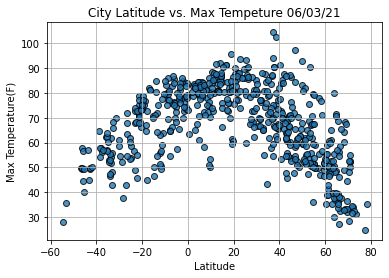

In [15]:
# import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Tempeture "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

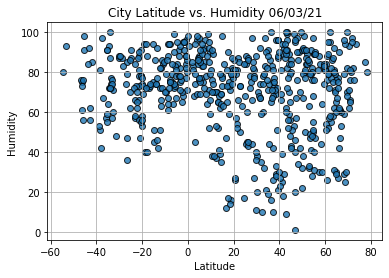

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

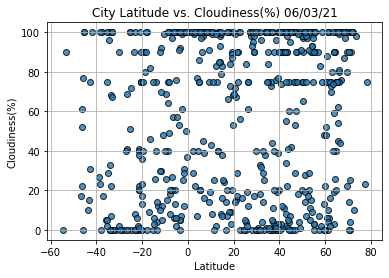

In [17]:
# Build the scatter plot for latitude vs. clodiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

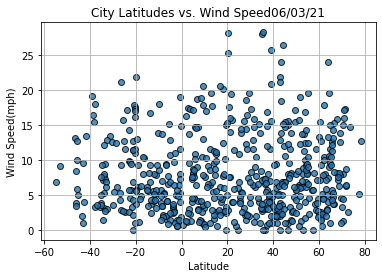

In [18]:
# Build the scatter plot for latitude vs. Wind speed.
plt.scatter(lats, 
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitudes vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [19]:
# import lineregress.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data.
# and Plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # run the regression on hemisphere weather data.
    (slope, intercept, r_value, p_value,std_err) = linregress(x_values, y_values)
    
    # calcualate the regression line "y_values" from the slope and intercept.
    regress_values = (x_values * slope + intercept) 
    
    # get the equation of the line.
    line_eq = "y = " + str(round(slope,2))+ "x +" + str(round(intercept,2))
    
    #create a scatter plot and the plot regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-06-04 00:50:30
Lat                        3.0707
Lng                        172.79
Max Temp                    83.16
Humidity                       74
Cloudiness                    100
Wind Speed                   9.51
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3      False
4       True
       ...  
572     True
573     True
574     True
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Quechultenango,MX,2021-06-04 00:54:34,17.4167,-99.2167,72.93,90,66,3.94
2,Araouane,ML,2021-06-04 00:54:34,18.9048,-3.5265,95.76,16,9,10.09
4,Kulhudhuffushi,MV,2021-06-04 00:54:34,6.6221,73.0700,82.51,75,98,18.68
5,Bethel,US,2021-06-04 00:54:35,41.3712,-73.4140,69.89,89,90,6.91
6,Thompson,CA,2021-06-04 00:50:45,55.7435,-97.8558,59.16,47,90,4.61


In [23]:
# create Nothern and Southern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

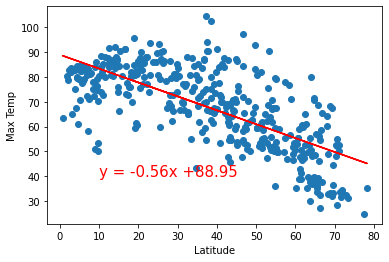

In [24]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Northern Hemisphere \
                      for Maximum Temperature", 
                      "Max Temp", (10,40))

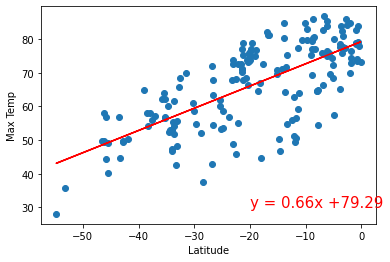

In [25]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Southern Hemisphere\
                      for Maximum Temperature", "Max Temp",(-20,30))

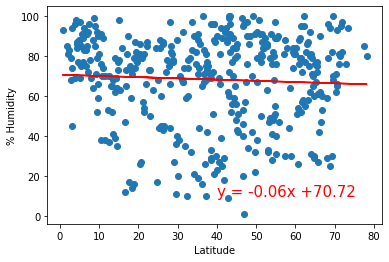

In [26]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Northern Hemisphere\
                      for % Humidity", "% Humidity", (40,10))

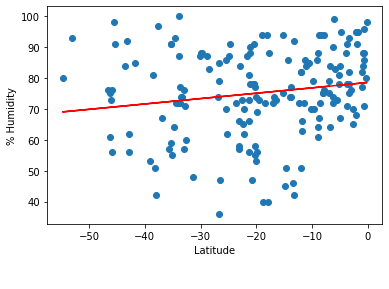

In [27]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Southern Hemisphere\
                      for % Humidity", "% Humidity", (-50,15))

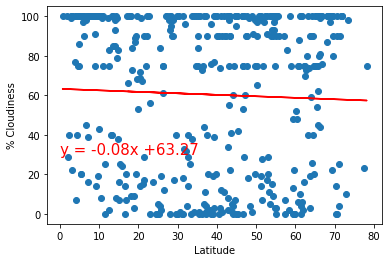

In [28]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Northern Hemisphere\
                      for % of Cloudiness", "% Cloudiness", (0,30))

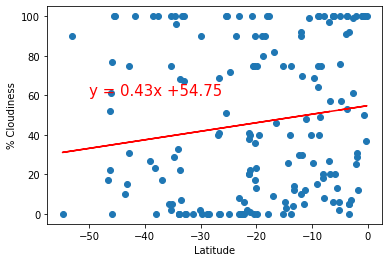

In [29]:
# Linear regression on the Southern Hemisphere vs Cloud
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Southern Hemisphere\
                      for % of Cloudiness", "% Cloudiness", (-50,60))

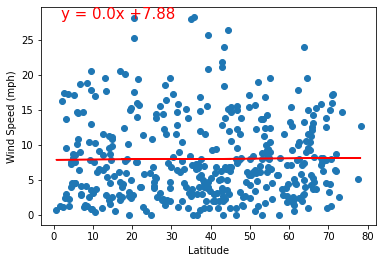

In [30]:
# Linear regression on the Northern Hemisphere vs Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Northern Hemisphere for Wind Speed", "Wind Speed (mph)", (2,28))

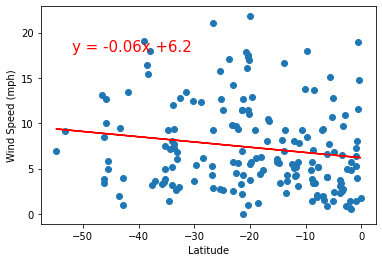

In [31]:
# Linear regression on the Southern Hemisphere vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear regression on the Southern Hemisphere \
                      for Wind Speed", "Wind Speed (mph)", (-52,18))